# グラムシュミット法によってマハラノビス距離を計算する関数を作成する

In [1]:
import pandas as pd
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import chi2
import matplotlib.dates as mdates
import random
from sklearn.model_selection import train_test_split

In [2]:
df_l8 = np.array([
        [1,1,1,1,1,1,1],
        [1,1,1,2,2,2,2],
        [1,2,2,1,1,2,2],
        [1,2,2,2,2,1,1],
        [2,1,2,1,2,1,2],
        [2,1,2,2,1,2,1],
        [2,2,1,1,2,2,1],
        [2,2,1,2,1,1,2]
        ])
df_l8==1

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False, False],
       [ True, False, False,  True,  True, False, False],
       [ True, False, False, False, False,  True,  True],
       [False,  True, False,  True, False,  True, False],
       [False,  True, False, False,  True, False,  True],
       [False, False,  True,  True, False, False,  True],
       [False, False,  True, False,  True,  True, False]])

## データの取得

In [3]:
df = pd.read_csv('../data/letter_recognition.csv', header=None)

#Aのみを判定するため，Aを１，A以外を0にした．
df[0] = df[0].apply(lambda x: 1 if x == 'A' else 0)

#Xとyを入力
X = df[range(1,17)]
y = df[0]



In [4]:
#バギング側の話
#ブートストラップサンプリングの個数
n = 10
seed = random.randint(0, n)

#使用する7つの変数をランダムに取得する
random.seed(1)
random_s = random.sample(list(X.columns), 7)
use_X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(use_X, y, test_size=0.2)


In [5]:
normal_idx = y_train[y_train == 0].index.to_list()
anomaly_idx = y_train[y_train == 1].index.to_list()

#通常状態の説明変数と目的変数を定義
normal_X = X_train.loc[normal_idx]
normal_y = y_train.loc[normal_idx]
anomaly_X = X_train.loc[anomaly_idx]
anomaly_y = y_train.loc[anomaly_idx]

In [6]:
#各説明変数ごとに標準化
def transform_standard(fit_X, transform_X):
    scaler = StandardScaler()
    scaler.fit(fit_X)
    return scaler.transform(transform_X)

#共分散行列の逆行列
def inv_cov(x):
    #標準化後のベクトルを入力する
    #標準化した後なので相関行列と分散共分散行列は一致する
    cov = np.cov(x.T)
    return np.linalg.inv(cov)

#マハラノビス汎距離
def cal_MD(Z, inv_C, k):
    MD = []
    for i in range(len(Z)):
        _a = np.dot(Z[i], inv_C)
        _MD = np.dot(_a, Z[i].T)
        _MD = _MD / k
        MD.append(_MD)
    return MD


In [7]:
#標準化
normal_Z = transform_standard(normal_X, normal_X)
anomaly_Z = transform_standard(normal_X, anomaly_X) #異常データも正常データの平均と分散で標準化

#共分散行列の逆行列
inv_C = inv_cov(normal_Z)

#マハラノビス距離の計算
normal_MD = cal_MD(normal_Z, inv_C, len(use_X.columns))
anomaly_MD = cal_MD(anomaly_Z, inv_C, len(use_X.columns))


In [8]:
normal_MD

[0.8206172070768238,
 0.41933783461990526,
 0.7854019040734121,
 1.8287596751034065,
 1.2129575885263584,
 0.4480993043605665,
 0.793952851731451,
 0.25223316107457067,
 1.4801790242020125,
 0.3975013214740701,
 2.083130194507069,
 1.7300949247434272,
 1.6967799943108177,
 1.3916790645325448,
 1.8118557443633636,
 0.08687107014539466,
 1.0815332534648578,
 0.43769352782245285,
 0.8851522094692471,
 0.8913830488056531,
 0.5357598236754362,
 2.811123471961648,
 1.565612108531539,
 1.0955596372899221,
 0.6607897762815399,
 0.7657028728547507,
 1.2448461902887311,
 0.4095919600867924,
 3.416198283637896,
 0.5294518611785712,
 1.600545824174699,
 1.4601900902263816,
 0.18047447099717775,
 1.180367148433169,
 0.6699776929252094,
 0.47602368344830953,
 0.7334772805241992,
 0.7312728828410181,
 0.3692784568474056,
 1.2224889020871694,
 1.0960686782045976,
 1.5051688768624236,
 1.5503220226826195,
 1.6253296287217247,
 0.3747009535898691,
 0.3635550693524797,
 0.8219312893478562,
 1.15062649792

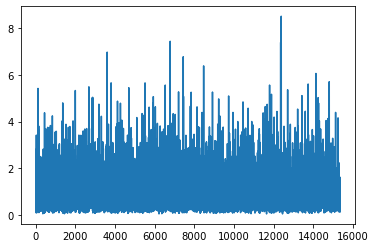

In [9]:
plt.plot(normal_MD)

In [10]:
gram_vec, r = np.linalg.qr(normal_Z)
ips = np.diag(np.cov(gram_vec.T))
gram_vec

array([[-0.00926696, -0.00482417, -0.00754146, ...,  0.01366922,
         0.00360712, -0.00212889],
       [ 0.00171223, -0.00727119, -0.00206533, ...,  0.00011409,
        -0.00071891, -0.00873412],
       [ 0.00537196,  0.00908903, -0.01329643, ..., -0.00302844,
         0.00510168, -0.00575244],
       ...,
       [ 0.01635115, -0.00623991, -0.00207643, ...,  0.00610564,
        -0.00922407,  0.00199018],
       [-0.00926696, -0.00482417, -0.00214347, ...,  0.00454886,
        -0.00056353, -0.00468475],
       [-0.00926696, -0.00482417, -0.00214347, ..., -0.01588755,
        -0.00120991, -0.00135031]])

In [11]:
ips[0]

6.513809275664403e-05

In [12]:
gram_vec[0][0]**2 / ips[0]

1.3183773629989168

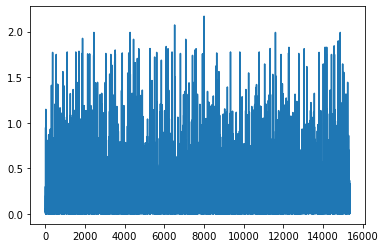

In [13]:
MD = []
k = gram_vec.shape[1]
for one_vec in gram_vec:
    _MD = 0
    for i, value in enumerate(one_vec):
        _MD += (value**2) / (ips[i])
        _MD = _MD / k
    MD.append(_MD)
plt.plot(MD)
        


## 一つのデータでそれぞれのマハラノビス距離を計算する

In [14]:
_a = np.dot(normal_Z[0], inv_C)
_MD = np.dot(_a, normal_Z[0].T)
_MD / 7

0.8206172070768238

In [15]:
normal_Z[0]

array([-1.14824355, -0.5155805 , -0.94884703, -0.44846422, -2.1298689 ,
        0.73305969,  0.04442483])

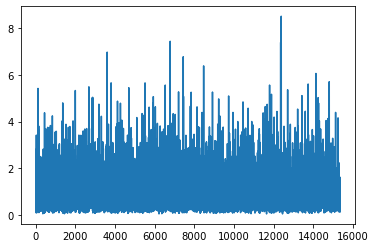

In [16]:
MD = []
k = 7
for one_Z in normal_Z:
    _a = np.dot(one_Z, inv_C)
    _MD = np.dot(_a, one_Z.T)
    _MD = _MD / k
    MD.append(_MD)
plt.plot(MD)

In [17]:
MD[0]

0.8206172070768238

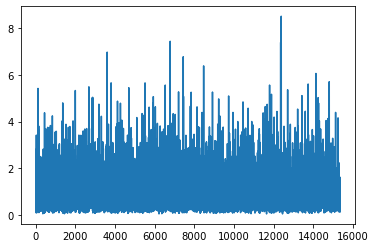

In [18]:
gram_MD = []
k = 7
for one_gram_vec in gram_vec:
    _gram_MD = 0
    for i, u in enumerate(one_gram_vec):
        _gram_MD += u**2 / ips[i]
    _gram_MD = _gram_MD / 7
    gram_MD.append(_gram_MD)
plt.plot(gram_MD)


In [19]:
gram_MD[0]

0.8206172070768474

In [20]:
pd.DataFrame([MD, gram_MD]).T.corr()

,0,1
0,1.0,1.0
1,1.0,1.0


In [21]:
#マハラノビス汎距離
def cal_MD(Z, inv_C):
    '''
    Z:標準化したベクトル
    inv_C:標準化後の共分散行列
    '''
    MD = np.zeros(len(Z))
    for i in range(len(Z)):
        _a = np.dot(Z[i], inv_C)
        _MD = np.dot(_a, Z[i].T)
        _MD = _MD / Z.shape[1]
        MD[i] = _MD
    return MD
cal_MD(normal_Z, inv_C)

array([0.82061721, 0.41933783, 0.7854019 , ..., 1.08460818, 0.35235382,
       0.91501654])

In [22]:
#グラムシュミット法によるマハラノビス汎距離
normal_gram_vec, _ = np.linalg.qr(normal_Z)
normal_ips = np.diag(np.cov(normal_gram_vec.T))
def gram_schmidt_cal_MD(gram_vec, ips):
    '''
    Z:標準化したベクトル
    '''
    
    k = gram_vec.shape[1]
    MD = np.zeros(gram_vec.shape[0])
    
    for i, one_gram_vec in enumerate(gram_vec):
        _MD = 0
        for q, u in enumerate(one_gram_vec):
            _MD += u**2 / ips[q]
        _MD = _MD / k
        MD[i] = _MD
    return MD

gram_schmidt_cal_MD(normal_gram_vec, normal_ips)

array([0.82061721, 0.41933783, 0.7854019 , ..., 1.08460818, 0.35235382,
       0.91501654])

In [23]:
a = np.cov(normal_gram_vec.T)

In [24]:
np.cov(np.array([[1, 2],[3, 4]]).T)

array([[2., 2.],
       [2., 2.]])

In [25]:
normal_ips

array([6.51380928e-05, 6.51380928e-05, 6.51380928e-05, 6.51380928e-05,
       6.51380928e-05, 6.51380928e-05, 6.51380928e-05])

In [26]:
%%time
cal_MD(normal_Z, inv_C)

Wall time: 51.7 ms


array([0.82061721, 0.41933783, 0.7854019 , ..., 1.08460818, 0.35235382,
       0.91501654])

In [27]:
%%time
gram_schmidt_cal_MD(normal_gram_vec, normal_ips)

Wall time: 74.6 ms


array([0.82061721, 0.41933783, 0.7854019 , ..., 1.08460818, 0.35235382,
       0.91501654])

In [28]:
cal_MD(anomaly_Z, inv_C)

array([0.54897735, 0.80594764, 0.25822561, 0.55762745, 0.39463252,
       0.60513348, 0.30384258, 0.21779212, 1.92620763, 0.61853359,
       2.08633282, 0.50054959, 0.55259264, 0.57357661, 1.33455282,
       0.62384528, 1.85899439, 1.40330856, 0.43783183, 0.49300385,
       0.63958031, 1.08064372, 2.61810238, 0.26737772, 1.29475827,
       1.19847365, 0.84231472, 2.54675265, 0.75744153, 0.55259264,
       0.94992329, 0.46573377, 0.82525866, 0.27624343, 0.46573377,
       1.51950693, 1.02736442, 0.6599005 , 0.43439196, 1.78021369,
       0.80954335, 1.2622194 , 1.25218622, 1.12561769, 0.53012852,
       0.8584129 , 0.60513348, 1.89007612, 0.85456941, 0.95552864,
       0.27624343, 4.71126415, 0.34773686, 0.5406784 , 0.22451173,
       0.55259264, 0.72732769, 0.67200487, 0.63289337, 0.77389384,
       0.84771989, 2.28253096, 0.6611131 , 0.77540917, 0.72647533,
       0.79079971, 0.38485903, 0.83602473, 0.54897735, 0.47706555,
       0.69200152, 0.42888744, 0.74562935, 0.61495043, 1.16679

In [29]:
gram_schmidt_cal_MD(normal_gram_vec, normal_ips)


array([0.82061721, 0.41933783, 0.7854019 , ..., 1.08460818, 0.35235382,
       0.91501654])

In [71]:
MD = []
for i in range(len(anomaly_X)):
    sample = normal_X.reset_index(drop=True)
    sample = sample.append(anomaly_X.iloc[i]).reset_index(drop=True)
    sample_Z = transform_standard(normal_X, sample)
    anomaly_gram_vec, _ = np.linalg.qr(sample_Z)
    MD.append(gram_schmidt_cal_MD(anomaly_gram_vec, normal_ips)[-1])
pd.DataFrame(MD)


,0
0,0.548840
1,0.805652
2,0.258195
3,0.557486
4,0.394562
...,...
642,0.857715
643,0.857518
644,0.810973
645,1.340916


In [31]:
sample_Z = transform_standard(normal_X, sample)

In [32]:
anomaly_gram_vec, _ = np.linalg.qr(Z)
pd.DataFrame(gram_schmidt_cal_MD(anomaly_gram_vec, normal_ips), index=X_train.index).loc[anomaly_idx]


,0
4886,0.513115
14431,0.730924
6408,0.236262
12508,0.513031
10417,0.378972
...,...
14871,0.826137
19203,0.806714
8255,0.764056
16707,1.266407


In [33]:
pd.DataFrame(cal_MD(anomaly_Z, inv_C), index=anomaly_idx)

,0
4886,0.548977
14431,0.805948
6408,0.258226
12508,0.557627
10417,0.394633
...,...
14871,0.858051
19203,0.857853
8255,0.811273
16707,1.341736


# 明日ここから！！！！

# できた！！！！！

In [34]:
#L8直行表
l8 = np.array([
    [1,1,1,1,1,1,1],
    [1,1,1,2,2,2,2],
    [1,2,2,1,1,2,2],
    [1,2,2,2,2,1,1],
    [2,1,2,1,2,1,2],
    [2,1,2,2,1,2,1],
    [2,2,1,1,2,2,1],
    [2,2,1,2,1,1,2]
    ])
l8 = (l8 == 1)
l8

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False, False],
       [ True, False, False,  True,  True, False, False],
       [ True, False, False, False, False,  True,  True],
       [False,  True, False,  True, False,  True, False],
       [False,  True, False, False,  True, False,  True],
       [False, False,  True,  True, False, False,  True],
       [False, False,  True, False,  True,  True, False]])

In [35]:
#異常データのマハラノビス距離
result = np.zeros((l8.shape[0], anomaly_Z.shape[0]))
for i, l8_row in enumerate(l8):
    result[i] = cal_MD(anomaly_Z[:, l8_row], inv_C[l8_row][:,l8_row])
result


array([[0.54897735, 0.80594764, 0.25822561, ..., 0.81127319, 1.34173595,
        1.12818194],
       [0.81414475, 1.66691331, 0.81414475, ..., 1.17608226, 0.72392134,
        3.02201274],
       [0.78876927, 0.34304566, 0.16598893, ..., 0.3258575 , 0.24768548,
        1.7340828 ],
       ...,
       [0.33831351, 0.30805763, 0.11758412, ..., 1.10111187, 0.24692022,
        2.20757785],
       [0.31521762, 0.9182262 , 0.43578507, ..., 0.37073917, 0.74006328,
        1.04321135],
       [0.48867644, 1.11251288, 0.36091576, ..., 1.24554322, 2.67686101,
        3.2350077 ]])

In [36]:
#異常データのマハラノビス距離
result = np.zeros((l8.shape[0], anomaly_Z.shape[0]))

for i, l8_row in enumerate(l8):
    _gram_vec, _ = np.linalg.qr(anomaly_Z[:, l8_row])
    result[i] = gram_schmidt_cal_MD(_gram_vec, normal_ips[l8_row])
result


array([[16.39907068, 13.18763491,  6.47958334, ..., 18.24982226,
        50.79338466, 21.38352322],
       [ 9.43740552, 20.90304841,  9.43740552, ..., 37.0755016 ,
        16.4307721 , 32.49439143],
       [24.94408966, 12.37357899,  7.20399173, ...,  8.50702906,
        18.3343913 , 43.59116868],
       ...,
       [ 9.66673412, 16.73425211,  5.76037926, ..., 34.17653701,
        16.73557682, 39.58413969],
       [ 3.65433844, 11.4164381 ,  6.70474677, ...,  5.4139151 ,
        21.75214394, 12.53635637],
       [ 4.86159423, 10.49390799,  3.72307593, ..., 22.83763947,
        58.70907407, 45.4223399 ]])

In [37]:
 #SN比
sn = np.zeros(l8.shape[0])
for idx, row in enumerate(result):
    sum_MD = 0
    for i in range(len(row)):
        sum_MD += 1 / row[i]
    sn[idx] = -10 * math.log10(sum_MD / len(row))
sn

array([11.87847325, 11.75508921, 10.78825781,  8.59781842,  9.72059755,
        9.9537332 ,  9.3703629 , 10.79446388])

In [38]:
X_train

,5,10,14,13,2,16,12
9877,1,7,7,2,0,9,8
8430,4,6,8,2,7,8,6
322,5,11,6,4,10,9,7
14003,3,14,9,2,10,11,6
3407,3,12,9,2,13,6,5
...,...,...,...,...,...,...,...
450,2,10,9,5,4,7,6
18925,0,7,10,3,0,8,8
5789,8,6,8,8,8,6,8
1555,1,7,8,2,3,8,7


In [39]:
# SN比を利用し，不要と思われる変数を削除する
#変数選択
df_sn = pd.DataFrame(index=X_train.columns, columns=['SN比'])
for i, clm in enumerate(X_train.columns):
    df_sn.loc[df_sn.index == clm, 'SN比'] = sum(sn[l8.T[i]]) - sum(sn[~l8.T[i]])
#使用した変数を保存
select_columns = df_sn[df_sn['SN比'] > 0].index
df_sn
    

,SN比
5,3.180481
10,3.75699
14,4.737982
13,0.656587
2,3.97106
16,-0.87609
12,-3.258021


In [40]:
df_sn.loc[select_columns]

,SN比
5,3.180481
10,3.75699
14,4.737982
13,0.656587
2,3.97106


In [41]:
weight = (df_sn[df_sn['SN比'] > 0] / df_sn[df_sn['SN比'] > 0].sum()).values
weight

array([[0.19508443552654312],
       [0.23044636152888157],
       [0.2906184784888307],
       [0.040273739076915734],
       [0.24357698537882888]], dtype=object)

In [42]:
weight[0] = weight[0] * 2 + 5

In [43]:
weight

array([[5.390168871053087],
       [0.23044636152888157],
       [0.2906184784888307],
       [0.040273739076915734],
       [0.24357698537882888]], dtype=object)

In [44]:
weight[0] * 2 + 5

array([15.780337742106173], dtype=object)

In [45]:
select_columns

Int64Index([5, 10, 14, 13, 2], dtype='int64')

## このSN比を重みとして加重マハラノビス距離を計算する

In [46]:
result_scaler = StandardScaler()
result_scaler.fit(X_train[select_columns][y == 0])
result_Z = result_scaler.transform(X_train[select_columns][y == 0])
result_Z

<ipython-input-46-3d78827ea5f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_scaler.fit(X_train[select_columns][y == 0])
<ipython-input-46-3d78827ea5f0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_Z = result_scaler.transform(X_train[select_columns][y == 0])


array([[-1.14824355, -0.5155805 , -0.94884703, -0.44846422, -2.1298689 ],
       [ 0.21215746, -0.91363479, -0.28023823, -0.44846422, -0.01223632],
       [ 0.66562446,  1.07663663, -1.61745583,  0.39931897,  0.8953205 ],
       ...,
       [ 2.02602547, -0.91363479, -0.28023823,  2.09488534,  0.29028262],
       [-1.14824355, -0.5155805 , -0.28023823, -0.44846422, -1.22231208],
       [-1.14824355, -0.5155805 , -0.28023823, -1.29624741,  0.8953205 ]])

In [47]:
weight

array([[5.390168871053087],
       [0.23044636152888157],
       [0.2906184784888307],
       [0.040273739076915734],
       [0.24357698537882888]], dtype=object)

In [48]:
#グラムシュミット法による加重マハラノビス汎距離
def weighted_gram_schmidt_cal_MD(Z, weight, ips):
    '''
    Z:標準化したベクトル
    '''
    gram_vec, _ = np.linalg.qr(Z)
    k = gram_vec.shape[1]
    MD = np.zeros(len(Z))
    
    for i, one_gram_vec in enumerate(gram_vec):
        _MD = 0
        for q, u in enumerate(one_gram_vec):
            _MD += weight[q] * (u**2 / ips[q])
        _MD = _MD / k
        MD[i] = _MD
    return MD
Z = result_scaler.transform(X_test[select_columns])
MD = weighted_gram_schmidt_cal_MD(Z, weight, normal_ips)
MD

array([10.73647859,  2.90167245,  3.14508558, ...,  2.17492582,
        2.96060483,  2.60504555])

In [49]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test.values, weighted_gram_schmidt_cal_MD(Z, weight, normal_ips)))
print(roc_auc_score(y_test.values, gram_schmidt_cal_MD(Z, normal_ips)))

0.5420499930636176
0.5439766645492446


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [51]:
clf = LogisticRegression(solver="liblinear", random_state=0).fit(use_X, y)
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8606407757065982

In [52]:
confusion_matrix(y_test, clf.predict(X_test))

array([[3847,   11],
       [ 136,    6]], dtype=int64)